In [1]:
import numpy as np
import pandas as pd

from complition.evaluation import calc_unobserved_rmse2
from svp_solver import svp_solve
from numpy.linalg import matrix_rank

import seaborn as sb
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv("RecData/ratings.csv")
data = data[["userId","movieId","rating"]]
matrix = data.pivot(index='userId', columns='movieId', values='rating').values

matrix = matrix[:400,:1000]

mask = 1-np.isnan(matrix).astype(int)
super_mask = np.copy(mask)
mask *= np.round(np.random.random(mask.shape)).astype(int)

matrix = np.nan_to_num(matrix)
print(np.count_nonzero(mask))


9400


In [26]:

answ_ar = []
for k in np.arange(2,3):
    answ,er = svp_solve(matrix,mask,delta=0.35,max_iterations=1000,k=k)
    answ_ar.append(answ)
print("complited")

99


199


299


399


499


599


699


799


899


999


complited


In [27]:
for i in answ_ar:
    print(calc_unobserved_rmse2(matrix,i,1-mask))
len(answ_ar)
super_mask == mask

0.7255079518109009


array([[False,  True, False, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [28]:
for i in answ_ar:
    print(calc_unobserved_rmse2(matrix,i,1-super_mask+mask))

1.1335002908468252


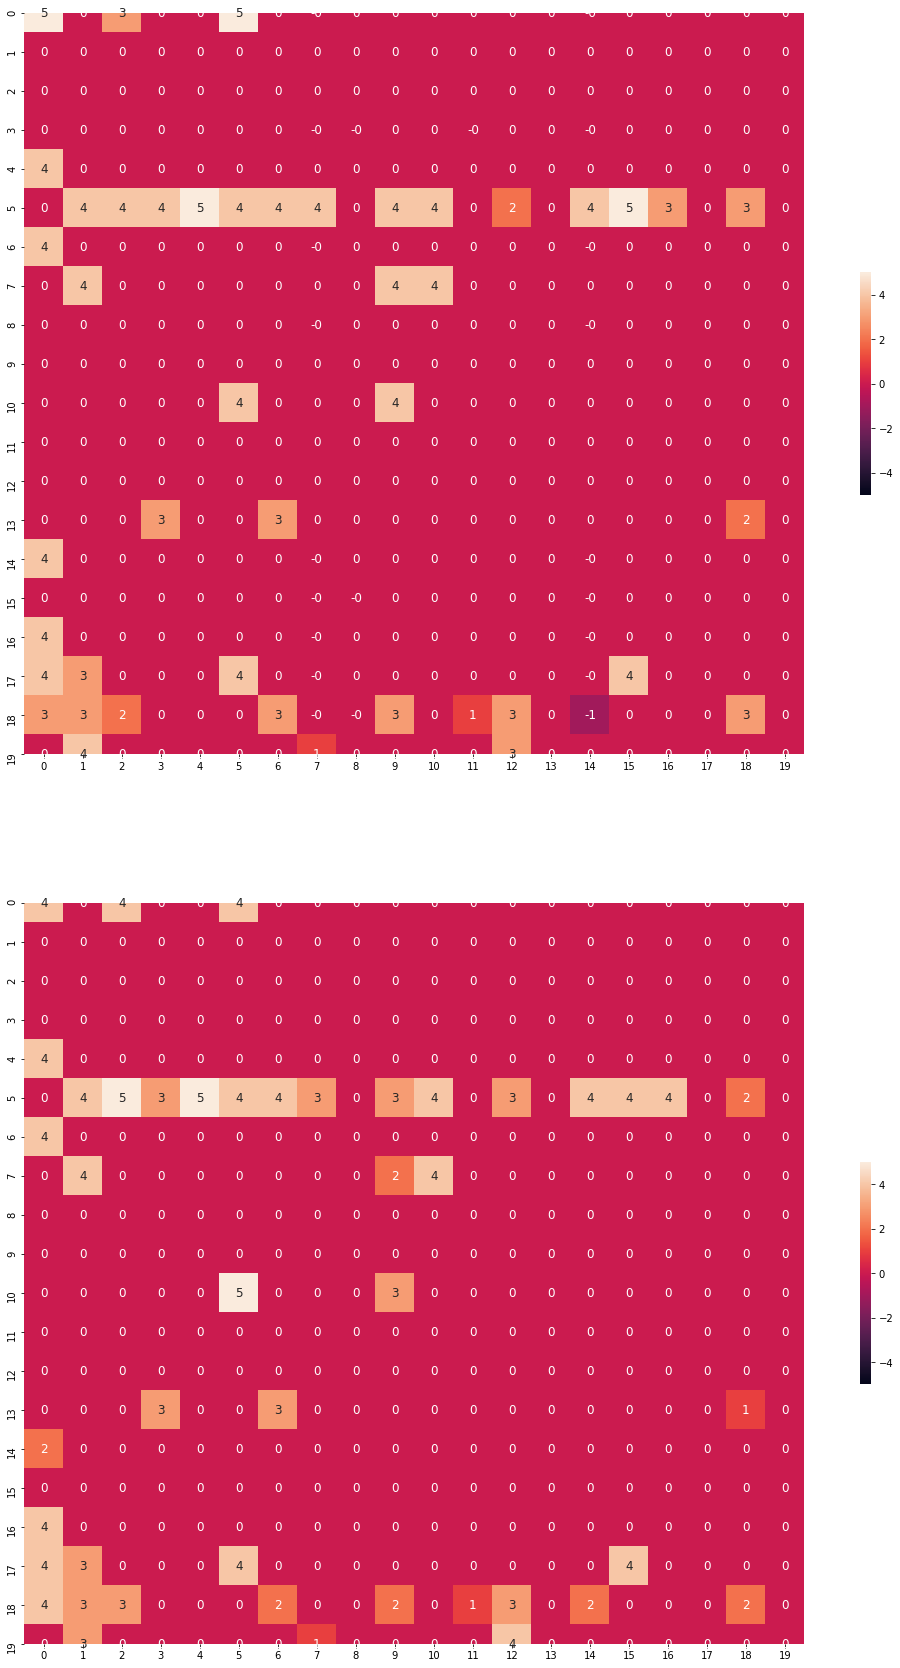

In [31]:
fig, ax = plt.subplots(nrows=len(answ_ar)+1,figsize = (20,30))


min_v = -5
max_v = 5

bound_films = 20
bound_users = 20
1
for i in range(0,len(answ_ar)):
    sb.heatmap(np.round((answ_ar[i]*super_mask)[:bound_users,:bound_films]), ax=ax[i],vmin=min_v,vmax=max_v, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sb.heatmap(np.round((matrix*super_mask)[:bound_users,:bound_films]), ax=ax[len(answ_ar)],vmin=min_v,vmax=max_v, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})

